In [2]:
# modules used
import random
import time
import numpy as np
import matplotlib.pyplot as plt
import math
import jax
import jax.numpy as jnp
import sympy as sp
import pandas as pd

In [42]:
a = 3
b = 5 
# swap 
a, b = b, a
print(a, b)

5 3


### Questions

Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

#### Ans/explanation:

Given two matrices $A$ and $B$:

$$A = \begin{pmatrix} a_{11} & a_{12} & \cdots & a_{1k} \\ a_{21} & a_{22} & \cdots & a_{2k} \\ \vdots & \vdots & \ddots & \vdots \\ a_{n1} & a_{n2} & \cdots & a_{nk} \end{pmatrix}, \quad B = \begin{pmatrix} b_{11} & b_{12} & \cdots & b_{1m} \\ b_{21} & b_{22} & \cdots & b_{2m} \\ \vdots & \vdots & \ddots & \vdots \\ b_{k1} & b_{k2} & \cdots & b_{km} \end{pmatrix}$$

Their product $C = AB$ is an $n \times m$ matrix:

$$C = \begin{pmatrix} c_{11} & c_{12} & \cdots & c_{1m} \\ c_{21} & c_{22} & \cdots & c_{2m} \\ \vdots & \vdots & \ddots & \vdots \\ c_{n1} & c_{n2} & \cdots & c_{nm} \end{pmatrix}$$

Where each element $c_{ij}$ is the dot product of the $i$-th row of $A$ and the $j$-th column of $B$.

For example, the element $c_{22}$ would be:

$$c_{22} = a_{21}b_{12} + a_{22}b_{22} + \cdots + a_{2k}b_{k2}$$

$$ \text{Total multiplications count} = \text{multiplications count in } c_{ij} * \text{No of elements in matrix C}$$
$$ \text{Total multiplications count} = k * n * m $$

Similarly, the total number of additions is:
$$ \text{Total additions count} = (k - 1) * n * m$$

Q2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [34]:
def generate_matrix_list(rows, cols, lb=1, ub=100):
    return [[random.randint(lb, ub) for _ in range(cols)] for _ in range(rows)]

In [35]:
def list_matrix_multiply(A, B):
    n = len(A)
    k = len(B)
    m = len(B[0])
    C = [[0] * m for _ in range(n)]
    for i in range(n):
        for j in range(m):
            for l in range(k):
                C[i][j] += A[i][l] * B[l][j]
    return C

In [36]:
def benchmark(dim):
    A = generate_matrix_list(dim, dim)
    B = generate_matrix_list(dim, dim)

    # List multiplication
    start = time.time()
    list_matrix_multiply(A, B)
    list_time = (time.time() - start) * 1000  # in milliseconds

    # NumPy multiplication
    np_A = np.array(A)
    np_B = np.array(B)
    start = time.time()
    np.dot(np_A, np_B)
    numpy_time = (time.time() - start) * 1000  # in milliseconds

    return list_time, numpy_time

In [37]:
def run_benchmarks(start=10, end=200, step=10):
    dims = list(range(start, end + 1, step))
    list_times = []
    numpy_times = []

    for dim in dims:
        # print(f"Benchmarking for dimension: {dim}x{dim}")
        list_time, numpy_time = benchmark(dim)
        list_times.append(list_time)
        numpy_times.append(numpy_time)

    return dims, list_times, numpy_times

In [38]:
def plot_results(dims, list_times, numpy_times):
    plt.figure(figsize=(10, 6))
    plt.plot(dims, list_times, label="List of Lists", marker='o')
    plt.plot(dims, numpy_times, label="NumPy", marker='s')
    plt.xlabel("Matrix Dimension (n x n)")
    plt.ylabel("Time Taken (ms)")
    plt.title("Matrix Multiplication Time: Lists vs NumPy")
    plt.xticks(ticks=range(dims[0], dims[-1] + 1, 20))
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

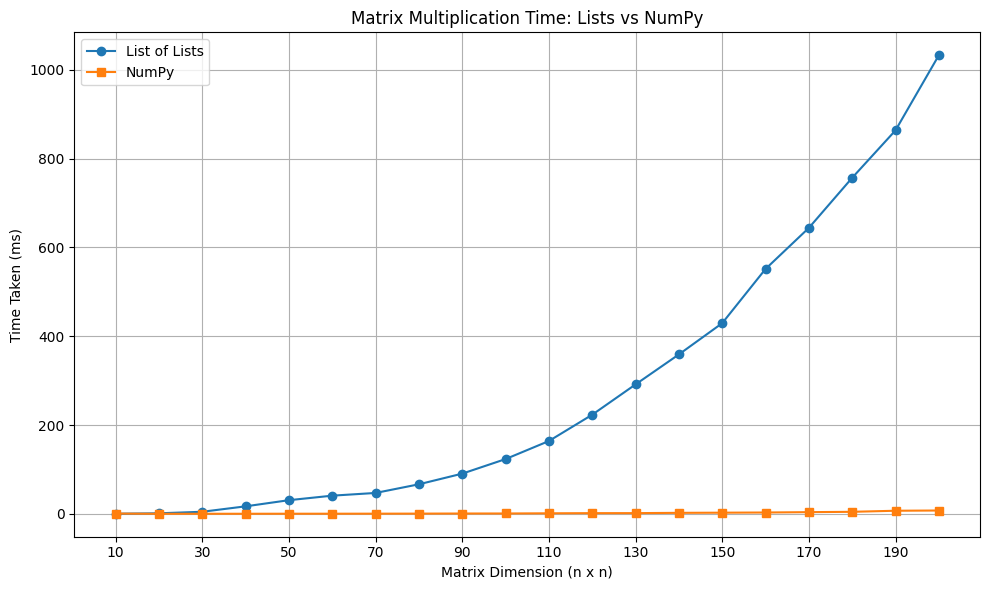

In [39]:
dims, list_times, numpy_times = run_benchmarks()
plot_results(dims, list_times, numpy_times)


#### Reason:
Python list and nested for loop approach does O(n*m*k) operations, and is of interpreted nature (not compiled), makes it slower for large matrices compared to optimized libraries like NumPy which leverage low-level optimizations (from C based libraries) and is compiled (faster) and is more efficient for large matrices.

Q3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [40]:
# approach 1: 

def make_pass(my_list):
    for pass_index in range(0, len(my_list)//2+1):
      curr_hightest_index = pass_index
      for i in range(pass_index+1, len(my_list)):
        if my_list[curr_hightest_index] < my_list[i]:
          curr_hightest_index = i
      my_list[pass_index], my_list[curr_hightest_index] = my_list[curr_hightest_index], my_list[pass_index]
    return my_list

def median_by_pass(my_list):
  make_pass(my_list)
  my_list.reverse()
  n = len(my_list)
  if n%2:
    return my_list[n//2]
  else:
    return (my_list[n//2-1] + my_list[n//2]) / 2
  
  
my_list = [100, 57, 15, 1, 12, 75, 5, 86, 89, 11]
print(f"list:\n{my_list}\n")
# profiling
start_time = time.time()
median = median_by_pass(my_list)
end_time = time.time()
print(f"median:\n{median}")
print(f"Time taken: {(end_time - start_time)*1000} milliseconds")

list:
[100, 57, 15, 1, 12, 75, 5, 86, 89, 11]

median:
36.0
Time taken: 0.03504753112792969 milliseconds


In [35]:
# approach 2: using randomized quick select
a, b = [-1], [-1] # b stores element at n/2 index, a stores for (n/2 -1)
def find_median(my_list):
  global a, b
  a, b = [-1], [-1] # Reset values for each call
  n = len(my_list)
  if n == 0:
    return None
  if n == 1:
    return my_list[0]
  if n == 2:
    return (my_list[0] + my_list[1])/2
  
  quick_select(my_list, 0, n-1, n//2, a, b)

  if n%2:
    return a[0]
  else:
    return (a[0]+b[0])/2


def quick_select(my_list, left, right, k, a, b):
  if left <= right:
    partition_index = partition(my_list, left, right)
    
    if partition_index == k:
      b[0] = my_list[partition_index]
      
      if a[0] != -1:
        return
    elif partition_index == k-1:
      a[0] = my_list[partition_index]
      if b[0] != -1:
        return
    
    if partition_index >= k:
      quick_select(my_list, left, partition_index-1, k, a, b)
    else:
      quick_select(my_list, partition_index+1, right, k, a, b)
  else:
    return


def partition(my_list, left, right):
  length = right - left + 1
  pivot_index = random.randint(0, length-1)
  my_list[left+pivot_index], my_list[right] = my_list[right], my_list[left+pivot_index]
  pivot_value = my_list[right]
  i = left
  for j in range(left, right):
    if my_list[j] < pivot_value:
      my_list[i], my_list[j] = my_list[j], my_list[i]
      i += 1 
  my_list[i], my_list[right] = my_list[right], my_list[i]
  return i

In [36]:
my_list = [100, 57, 15, 1, 12, 75, 5, 86, 89, 11]
print(f"list:\n{my_list}\n")
# profiling 
start_time = time.time()  
median = find_median(my_list=my_list)
end_time = time.time()
print(f"median:\n{median}")
print(f"Time taken: {(end_time - start_time)*1000} milliseconds")

list:
[100, 57, 15, 1, 12, 75, 5, 86, 89, 11]

median:
36.0
Time taken: 0.06508827209472656 milliseconds


In [41]:
# approach 3: using numpy
my_list = [100, 57, 15, 1, 12, 75, 5, 86, 89, 11]
print(f"list:\n{my_list}\n")

# profiling
start_time = time.time()
median = np.median(my_list)
end_time = time.time()
print(f"median:\n{median}")
print(f"Time taken: {(end_time - start_time)*1000} milliseconds")

list:
[100, 57, 15, 1, 12, 75, 5, 86, 89, 11]

median:
36.0
Time taken: 1.531839370727539 milliseconds


All above approaches are tested for very small size of list, which does not make a better comparison directly looking at time taken (depending on the machine). But the time growth rate in terms of input size $n$ of all above approaches are discussed below:

Approach 1 (using pass) takes n/2 passes, and each pass takes n-i comparisons, so total time complexity is $O(n^2)$.

Approach 2 (using randomized quick select, similar to quick sort) takes $O(n)$ time in average case, and $O(n^2)$ in worst case (whose probability is very low).

Approach 3 (using numpy) takes O(n) average time, since numpy also uses quick select internally, but highly optimized with partial sort (a variant of quick select, known as [introselect](https://stackoverflow.com/questions/50899486/why-does-numpy-median-scale-so-well) with C implementation) and it's worst case is $O(nlogn)$.

Q4. What is the gradient of the following function with respect to x and y?
$$f(x,y) = x^2y + y^3sin(x) $$

$$\frac{\partial f}{\partial x} = \frac{\partial}{\partial x}(x^2 y) + \frac{\partial}{\partial x}(y^3 \sin(x)) = 2x y + y^3 \cos(x)$$

$$\frac{\partial f}{\partial y} = \frac{\partial}{\partial y}(x^2 y) + \frac{\partial}{\partial y}(y^3 \sin(x)) = x^2 + 3y^2 \sin(x) $$

Q5. Use `JAX` to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

Since analytical gradient is:

$$\nabla f(x, y) = \left[ 2xy + y^3 \cos(x), \; x^2 + 3y^2 \sin(x) \right] $$

In [ ]:
def f(vec):
    x, y = vec
    return x**2 * y + y**3 * jnp.sin(x)

# Get gradient function
grad_f = jax.grad(f)

# Analytical gradient
def analytical_grad(x, y):
    df_dx = 2*x*y + y**3 * jnp.cos(x)
    df_dy = x**2 + 3*y**2 * jnp.sin(x)
    return jnp.array([df_dx, df_dy])

# few random points (x,y)
points = [
    (1.0, 2.0),
    (0.5, -1.0),
    (2.5, 0.3),
    (-1.2, 1.5)
]

for x, y in points:
    auto = grad_f(jnp.array([x, y]))
    manual = analytical_grad(x, y)
    print(f"\n(x, y) = ({x}, {y})")
    print(f"JAX grad      : {auto}")
    print(f"Manual grad   : {manual}")
    print(f"Difference    : {jnp.abs(auto - manual)}")


(x, y) = (1.0, 2.0)
JAX grad      : [ 8.322418  11.0976515]
Manual grad   : [ 8.322418  11.0976515]
Difference    : [0. 0.]

(x, y) = (0.5, -1.0)
JAX grad      : [-1.8775826  1.6882766]
Manual grad   : [-1.8775826  1.6882766]
Difference    : [0. 0.]

(x, y) = (2.5, 0.3)
JAX grad      : [1.4783691 6.4115877]
Manual grad   : [1.4783691 6.4115877]
Difference    : [0. 0.]

(x, y) = (-1.2, 1.5)
JAX grad      : [-2.3770428 -4.8512635]
Manual grad   : [-2.3770428 -4.8512635]
Difference    : [0. 0.]


Gradient difference for all points is zero, incdicating jax based grad is correct.

Q6. Use `sympy` to confirm that you obtain the same gradient analytically.

symbollically computing gradient of:

$$\nabla f(x, y) = \left[ \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right]$$

As, 

$$\nabla f(x, y) = \left[ 2xy + y^3 \cos(x), \; x^2 + 3y^2 \sin(x) \right] $$

In [46]:
# Declare symbolic variables
x, y = sp.symbols('x y')

f = x**2 * y + y**3 * sp.sin(x)

# Compute partial derivatives
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

print("∂f/∂x =", df_dx)
print("∂f/∂y =", df_dy)

∂f/∂x = 2*x*y + y**3*cos(x)
∂f/∂y = x**2 + 3*y**2*sin(x)


Results matches.

Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

1. 2022  
   1. Branch 1  
      1. Roll Number: 1, Name: N, Marks:  
         1. Maths: 100  
         2. English: 70  
      2. Roll Number: 2, Name: M, Marks:  
         1. Maths: 90  
         2. English: 80  
   2. Branch 2  
      1. Roll Number: 3, Name: A, Marks:  
         1. Maths: 95  
         2. English: 85  

2. 2023  
   1. Branch 1  
   2. Branch 2  

3. 2024  
   1. Branch 1  
   2. Branch 2  

4. 2025  
   1. Branch 1  
   2. Branch 2  


In [ ]:
data = {
    "2022": {
        "Branch 1": [
            {
                "Roll Number": 1,
                "Name": "N",
                "Marks": {
                    "Maths": 100,
                    "English": 70
                }
            },
            {
                "Roll Number": 2,
                "Name": "M",
                "Marks": {
                    "Maths": 90,
                    "English": 80
                }
            }
        ],
        "Branch 2":
            {
            }
        
    },
    "2023": {
        "Branch 1": {},
        "Branch 2": {}
    },
    "2024": {
        "Branch 1": {},
        "Branch 2": {}
    },
    "2025": {
        "Branch 1": {},
        "Branch 2": {}
    }
}


Q8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [49]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks 

    def __repr__(self):
        return f"Student(roll={self.roll_number}, name='{self.name}', marks={self.marks})"


class Branch:
    def __init__(self, name):
        self.name = name
        self.students = [] 

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        return f"Branch(name='{self.name}', students={self.students})"


class Year:
    def __init__(self, year):
        self.year = year
        self.branches = [] 

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        return f"Year(year={self.year}, branches={self.branches})"



database = []

year_2022 = Year(2022)

branch1_2022 = Branch("Branch 1")
branch1_2022.add_student(Student(1, "N", {"Maths": 100, "English": 70}))
branch1_2022.add_student(Student(2, "M", {"Maths": 90, "English": 80}))

branch2_2022 = Branch("Branch 2")
branch2_2022.add_student(Student(3, "A", {"Maths": 95, "English": 85}))

year_2022.add_branch(branch1_2022)
year_2022.add_branch(branch2_2022)

database.append(year_2022)


for y in [2023, 2024, 2025]:
    year = Year(y)
    year.add_branch(Branch("Branch 1"))
    year.add_branch(Branch("Branch 2"))
    database.append(year)



Q9. Using matplotlib plot the following functions on the domain: $x = 0.5$ to $100.0$ in steps of $0.5$.

$$ y = x $$
$$ y = x^2 $$
$$ y = \frac{x^3}{100} $$
$$ y = \sin(x) $$
$$ y = \frac{\sin(x)}{x} $$
$$ y = \log(x) $$
$$ y = e^x $$


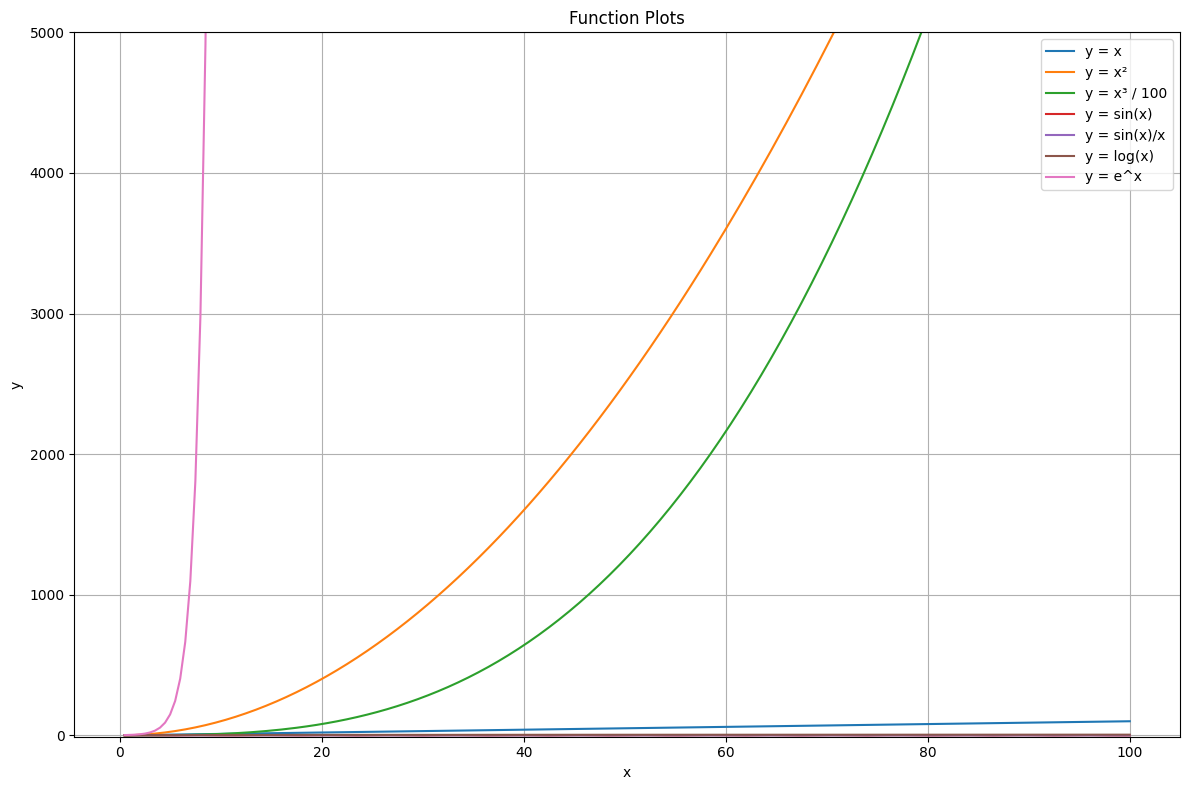

In [51]:
x = np.arange(0.5, 100.5, 0.5)

# Functions
y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

plt.figure(figsize=(12, 8))

# Plot each function
plt.plot(x, y1, label='y = x')
plt.plot(x, y2, label='y = x²')
plt.plot(x, y3, label='y = x³ / 100')
plt.plot(x, y4, label='y = sin(x)')
plt.plot(x, y5, label='y = sin(x)/x')
plt.plot(x, y6, label='y = log(x)')
# Use a mask to avoid overflow in exp(x)
y7_masked = np.ma.masked_where(np.exp(x) > 1e10, np.exp(x))
plt.plot(x, y7_masked, label='y = e^x')

# Labels and title
plt.title('Function Plots')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.ylim(-10, 5000)
plt.tight_layout()

plt.show()


Q10. Using numpy generate a matrix of size `20X5` containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [3]:
# 20x5 matrix with values uniformly drawn from [1, 2)
matrix = np.random.uniform(low=1.0, high=2.0, size=(20, 5))

# pandas dataframe
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

# column with highest standard deviation
col_std = df.std()
highest_std_col = col_std.idxmax()
print(f"Column with highest standard deviation: {highest_std_col}")

# row with lowest mean
row_mean = df.mean(axis=1)
lowest_mean_row = row_mean.idxmin()
print(f"Row with lowest mean: {lowest_mean_row}")


Column with highest standard deviation: a
Row with lowest mean: 17


Q11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [4]:
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

lt8_count = (df['g'] == 'LT8').sum()
print(f"Number of rows where 'g' is 'LT8': {lt8_count}")

# standard deviation of 'f' for LT8 and GT8 groups
std_lt8 = df[df['g'] == 'LT8']['f'].std()
std_gt8 = df[df['g'] == 'GT8']['f'].std()

print(f"Standard deviation of 'f' for LT8 rows: {std_lt8}")
print(f"Standard deviation of 'f' for GT8 rows: {std_gt8}")

Number of rows where 'g' is 'LT8': 15
Standard deviation of 'f' for LT8 rows: 0.5664644437283151
Standard deviation of 'f' for GT8 rows: 0.3302670616574388


Q12.Write a small piece of code to explain broadcasting in numpy.

In [5]:
# A (3, 1) column vector
a = np.array([[2],
              [4],
              [6]])

# A (1, 4) row vector
b = np.array([[8, 10, 25, 20]])

# Broadcasting adds the (3, 1) and (1, 4) arrays to get a (3, 4) array
result = a + b

print("Array a:\n", a)
print("Array b:\n", b)
print("Result of a + b (broadcasted):\n", result)

Array a:
 [[2]
 [4]
 [6]]
Array b:
 [[ 8 10 25 20]]
Result of a + b (broadcasted):
 [[10 12 27 22]
 [12 14 29 24]
 [14 16 31 26]]
